In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv(r'D:\Desktop\lab8\s.csv')
df.columns= ['x1','x2']
df

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
395,616325,730469
396,554610,782542
397,727303,809509
398,603709,757145


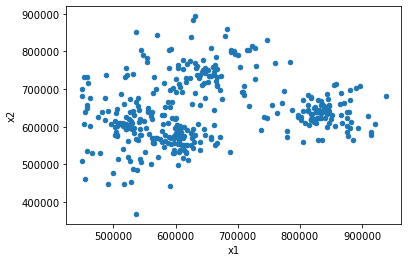

In [6]:
df.plot.scatter('x1', 'x2');

K-means steps


1.   define k
2.   randomly place k centroids
3.   assign each point to a cluster( the cluster of the closest centroid)
4.   update the centroids( the new centroid is the mean of the cluster)
5.   repeat from step 3
6.   stop when the centroids no longer change



In [7]:
k = 4
centroids = df[['x1','x2']].sample(4).values
centroids

array([[665845, 557965],
       [616325, 730469],
       [832215, 638387],
       [589675, 755546]], dtype=int64)

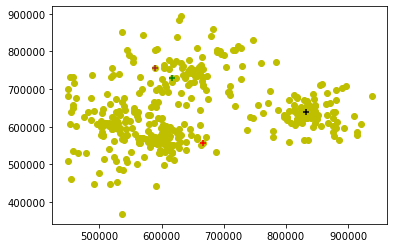

In [8]:
plt.scatter(df['x1'], df['x2'], c = 'y')
plt.scatter(centroids[:,0], centroids[:,1], color = ['r', 'g', 'black', 'brown'], marker  = '+')

In [9]:
df['1'] = np.sqrt((df['x1'] - centroids[0][0]) ** 2  + (df['x2'] - centroids[0][1]) ** 2)

df['2'] = np.sqrt((df['x1'] - centroids[1][0]) ** 2 + (df['x2'] - centroids[1][1]) ** 2)
  

df['3'] = np.sqrt((df['x1'] - centroids[2][0]) ** 2 + (df['x2'] - centroids[2][1]) ** 2)
  
df['4'] = np.sqrt((df['x1'] - centroids[3][0]) ** 2 + (df['x2'] - centroids[3][1]) ** 2)
  

In [10]:
df.head()

,x1,x2,1,2,3,4
0,664159,550946,7218.653406,185786.434071,189443.256985,217736.139067
1,665845,557965,0.000000,179471.057321,184788.189514,211754.859356
2,597173,575538,70884.793242,156110.261882,243299.688789,180164.092061
3,618600,551446,47692.634505,179037.454612,230629.802294,206139.432484
4,635690,608046,58458.793915,123945.125576,198853.342708,154510.938852


In [11]:
df.loc[1, ['1', '2', '3', '4']].idxmin(axis=1)

'1'

In [12]:
colors = {'1': 'r', '2':'g', '3': 'black', '4':'brown' }

In [13]:
df['closest'] = df.loc[:, ['1', '2', '3', '4']].idxmin(axis=1)
df['color'] = df['closest'].map(lambda x: colors[x])

In [14]:
df.sample(10)

,x1,x2,1,2,3,4,closest,color
65,628696,542447,40259.862456,188428.538510,224998.815466,216642.152505,1,r
260,517783,448891,183900.770308,298323.139981,367118.804531,314969.440881,1,r
183,823364,620870,169615.077119,234258.592846,19626.143024,269718.693637,3,black
85,565148,557305,100699.162901,180568.148423,279104.054455,199752.516405,1,r
72,620438,511694,64829.014261,218813.659066,246780.497564,245784.784055,1,r
19,601967,604428,78988.665345,126856.162030,232738.813233,151617.093983,1,r
123,839324,651033,196867.000955,236724.802454,14507.211896,270642.920414,3,black
125,876202,600942,214702.328767,290367.523766,57766.635647,325576.593976,3,black
365,683055,858799,301325.869543,144642.600226,266139.353242,139215.683057,4,brown
370,635082,737943,182588.177747,20191.228913,220845.685548,48699.704907,2,g


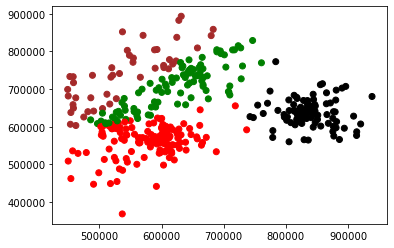

In [15]:
plt.scatter(df['x1'], df['x2'], c = df['color'])

In [17]:
df = pd.read_csv(r'D:\Desktop\lab8\s.csv')
df.columns= ['x1','x2']
df.head()

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [18]:
k = 4
centroids = df[['x1','x2']].sample(4).values
colors = {1: 'r', 2:'g', 3: 'black', 4:'brown' }

In [19]:
it  = 0
for it in range(500):
    df['1'] = np.sqrt((df['x1'] - centroids[0][0]) ** 2  + (df['x2'] - centroids[0][1]) ** 2)

    df['2'] = np.sqrt((df['x1'] - centroids[1][0]) ** 2 + (df['x2'] - centroids[1][1]) ** 2)


    df['3'] = np.sqrt((df['x1'] - centroids[2][0]) ** 2 + (df['x2'] - centroids[2][1]) ** 2)

    df['4'] = np.sqrt((df['x1'] - centroids[3][0]) ** 2 + (df['x2'] - centroids[3][1]) ** 2)


    df['closest'] = df.loc[:, ['1', '2', '3', '4']].idxmin(axis=1).apply(int)
    df['color'] = df['closest'].map(lambda x: colors[x])
    old  = centroids.copy
    for i in range(len(centroids)):
        centroids[i][0] = np.mean(df[df['closest'] == i+1]['x1'])
        centroids[i][1] = np.mean(df[df['closest'] == i+1]['x2'])

    if np.all(old == centroids):
        break


In [20]:
it

499

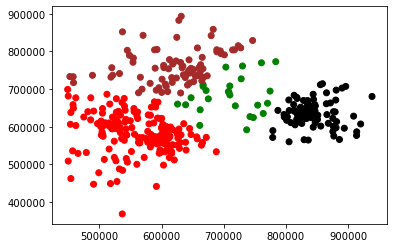

In [21]:
plt.scatter(df['x1'], df['x2'], c = df['color'])

# the K-means is better than the maximum and average methods